# ** DOGS VS CATS**

## IMPORTING REQUIRED PACKAGES ##

In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import zipfile

from tensorflow.keras.utils import load_img

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

## DEFINING CONSTANTS ##

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

## PREPARING TRAINING DATA SETS ##

In [ ]:
#Defining a function to extract the folders to the empty file named Work

def extract_files(source_path, target_path):
    zip_ref = zipfile.ZipFile(source_path,'r')
    zip_ref.extractall(target_path)
    zip_ref.close()
extract_files('D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\test1.zip','D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work')
extract_files('D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\train.zip','D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work')

CREATING DATA FRAMES WITH COLUMNS AS FILENAME AND CATEGORY(DOG OR CAT)

In [ ]:
## categoriation of the dogs and cats by assuming the dog as '1' and cat as '0' ##

filenames = os.listdir("D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
## the first five rows of the data frame ##

df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [ ]:
## The last five elements of dataframe ##

df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


<AxesSubplot:>

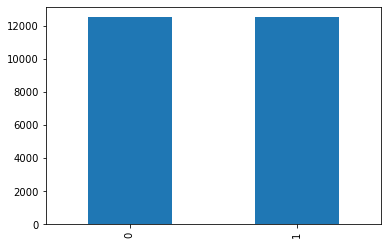

In [ ]:
##representaion of total no of 1's(dogs) and 0's(cats) in data frame  ##

df['category'].value_counts().plot.bar()

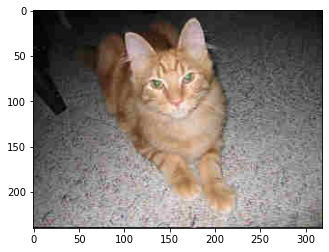

In [ ]:
## loading an randomly selected ##

sample = random.choice(filenames)
image = load_img("D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\train\\"+sample)
plt.imshow(image)

In [ ]:
## Building models ##

'''

Input Layer: It represent input image data. It will reshape image into single diminsion array. Example your image is 
64x64 = 4096, it will convert to (4096,1) array.

Conv Layer: This layer will extract features from image.

Pooling Layer: This layer reduce the spatial volume of input image after convolution.

Fully Connected Layer: It connect the network from a layer to another layer

Output Layer: It is the predicted values layer.

'''

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 61, 61, 64)      

In [ ]:
train_df

,filename,category
0,dog.8479.jpg,dog
1,dog.876.jpg,dog
2,cat.10915.jpg,cat
3,dog.10127.jpg,dog
4,cat.11377.jpg,cat
...,...,...
19995,dog.6916.jpg,dog
19996,cat.36.jpg,cat
19997,cat.10771.jpg,cat
19998,dog.1713.jpg,dog


In [ ]:
'''
ReduceLROnPlateau reduces learining rate when a metric has stopped improving

EarlyStopping  is used to stop the model as soon as it gets overfitted

'''
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
## storing the training and test sets  in train_df and validate_df respectively##

df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [ ]:
df

,filename,category
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat
...,...,...
24995,dog.9995.jpg,dog
24996,dog.9996.jpg,dog
24997,dog.9997.jpg,dog
24998,dog.9998.jpg,dog


<AxesSubplot:>

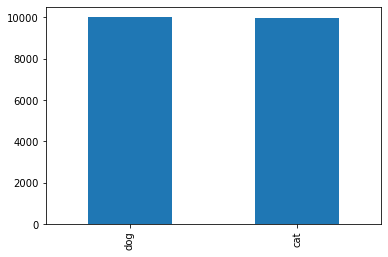

In [ ]:
## Representation of no of dogs and cats in train dataframe ##

train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

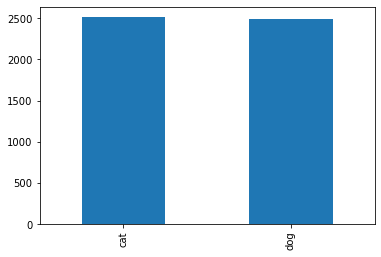

In [ ]:
## Representation of no of dogs and cats in validate dataframe ##

validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
'''ImageDataGenerator lets you augment your images in real-time while your model is still training'''

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\train\\", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)


Found 1 validated image filenames belonging to 1 classes.


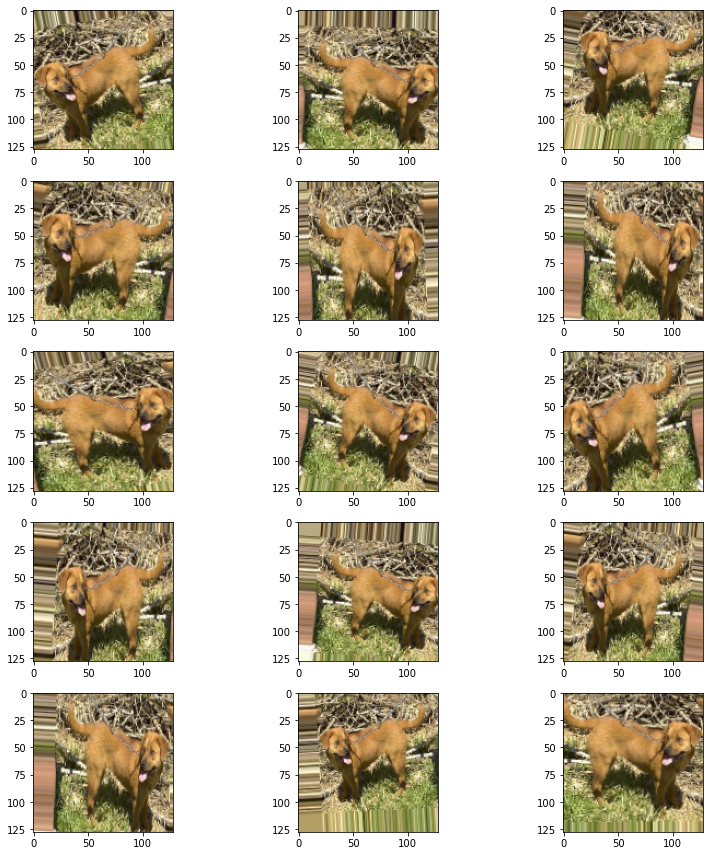

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    # x-batch refers to the matrix of image
    # y_batch refers to the data type
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [ ]:
epochs=3 if FAST_RUN else 10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-24-43318625620a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
1333/1333 [==============================] - 651s 489ms/step - loss: 0.3956 - accuracy: 0.8266 - val_loss: 0.3911 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 2/10
1333/1333 [==============================] - 640s 480ms/step - loss: 0.3806 - accuracy: 0.8350 - val_loss: 0.4157 - val_accuracy: 0.8142 - lr: 0.0010
Epoch 3/10
1333/1333 [==============================] - 644s 483ms/step - loss: 0.3747 - accuracy: 0.8362 - val_loss: 0.2889 - val_accuracy: 0.8775 - lr: 0.0010
Epoch 4/10
1333/1333 [==============================] - 643s 482ms/step - loss: 0.3604 - accuracy: 0.8415 - val_loss: 0.4467 - val_accuracy: 0.8084 - lr: 0.0010
Epoch 5/10
1333/1333 [==============================] - 658s 494ms/step - loss: 0.3576 - accuracy: 0.8445 - val_loss: 0.3114 - val_accuracy: 0.8733 - lr: 0.0010
Epoch 6/10
1333/1333 [==============================] - 645s 484ms/step - loss: 0.3458 - accuracy: 0.8507 - val_loss: 0.2709 - val_accuracy: 0.8875 - lr: 0.0010
Epoch 7/10
1333/1333 [============

In [ ]:
model.save_weights("model.h5")

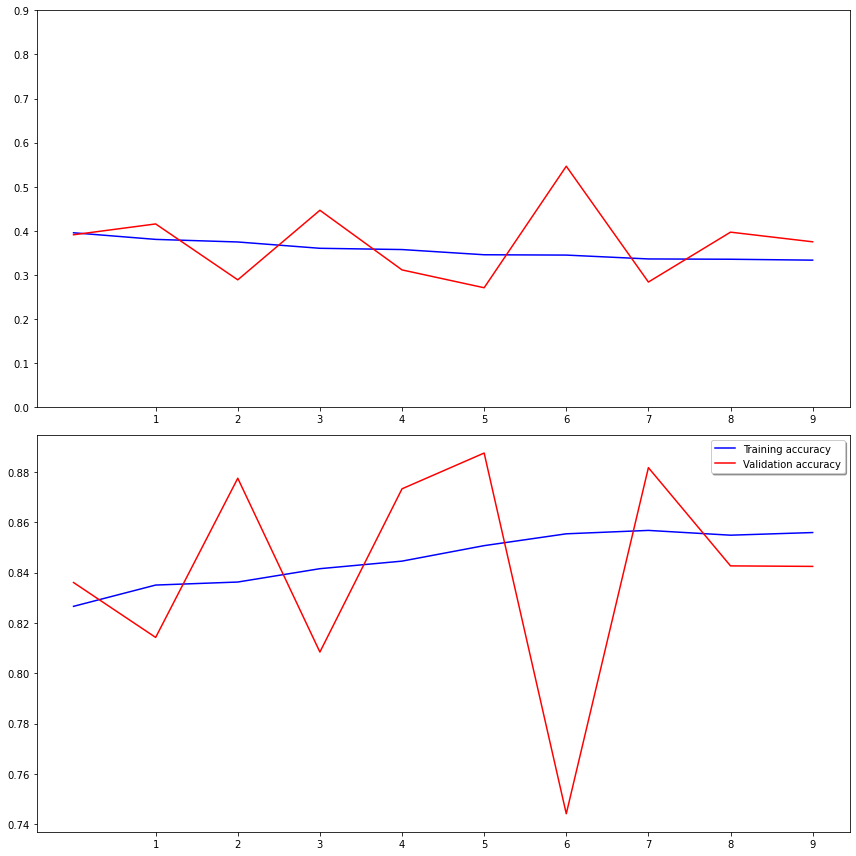

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
test_filenames = os.listdir("D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\test1\\", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-31-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

<AxesSubplot:>

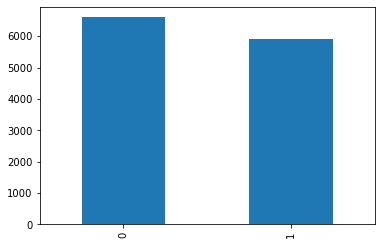

In [ ]:
test_df['category'].value_counts().plot.bar()

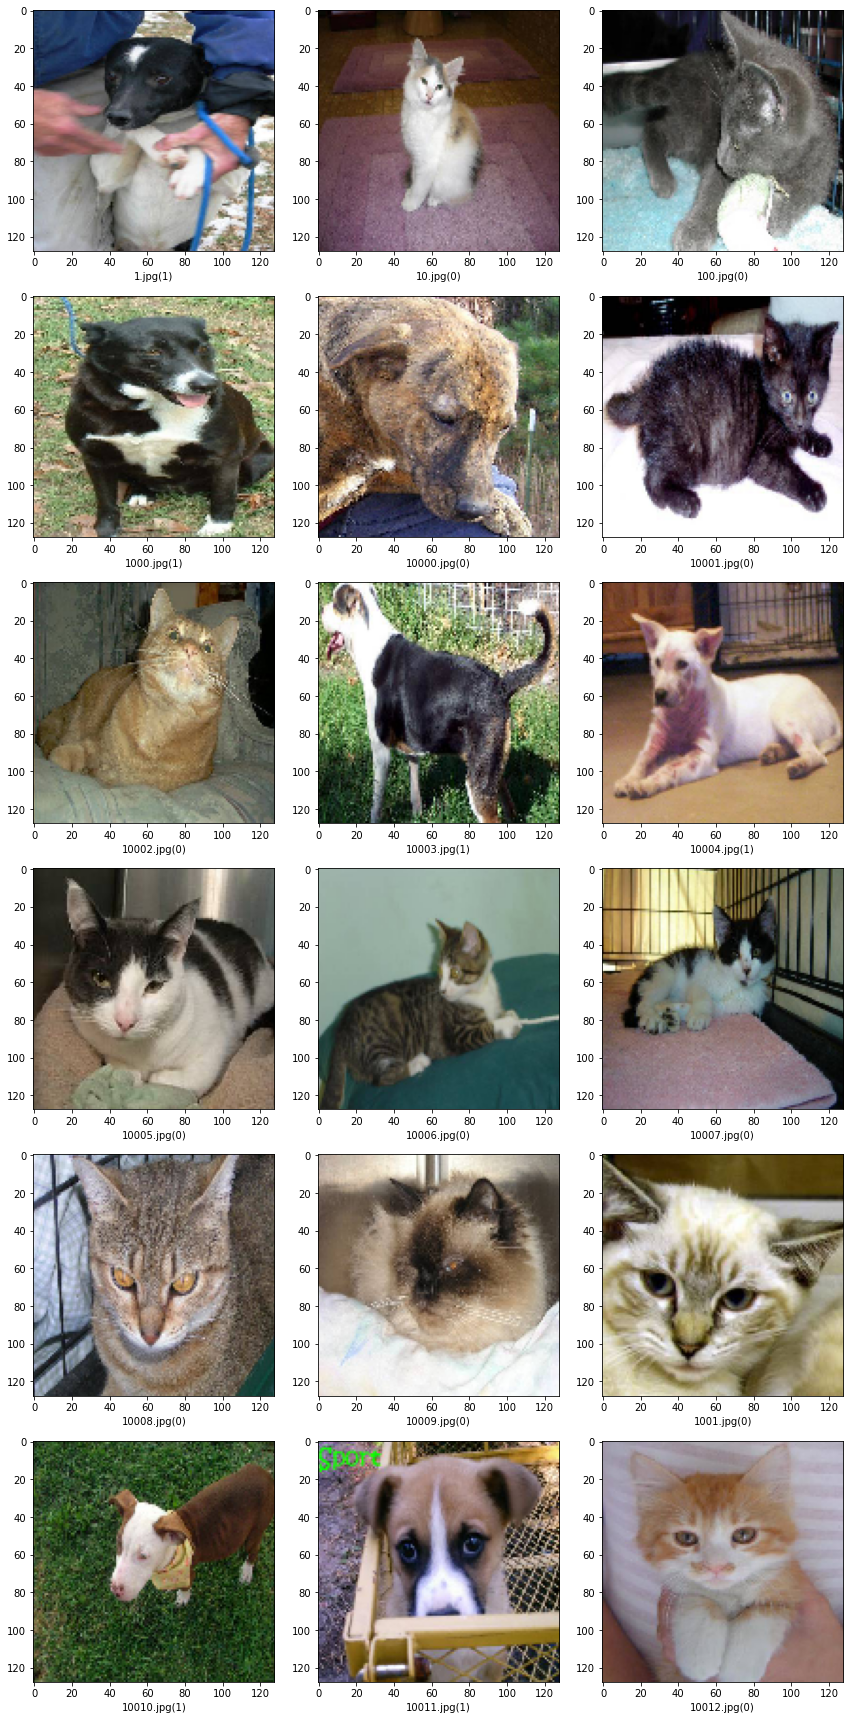

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\work\\test1\\"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [ ]:
test_df['category'].value_counts()

0    6600
1    5900
Name: category, dtype: int64

## preparing a csv file to the test_dataframe

In [ ]:
test_df.to_csv('D:\\INTERNSHIP (INDIAN SERVERS)\\DOC\\submission.csv')